## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

## About the Dataset

The Dataset contains the information of Breast cancer.It has 699 instances and 11 attributes of breast_cancer patients.On the basis of all these, attributes, since we have to classify whether the class is benign or malignant, lets check the classifical model, which bests suits it.

#### Attribute information:

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

## Loading the csv file

In [2]:
filename = r"C:\Users\sadhana\Downloads\breast_Cancer.csv"
header = ["Id","clump_thickness","cell_size","cell_shape","adhesion","single_epi_cell","bare_nuclei","chromatin","nucleoli",
          "mitosis","class"]
df= pd.read_csv(filename,names = header)
df.head(5) # checking top 5 rows

,Id,clump_thickness,cell_size,cell_shape,adhesion,single_epi_cell,bare_nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.tail()

,Id,clump_thickness,cell_size,cell_shape,adhesion,single_epi_cell,bare_nuclei,chromatin,nucleoli,mitosis,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


# 2.Data Preprocessing

In [4]:
# replacing all ? values with nan
df.replace("?",np.nan, inplace = True)

In [5]:
# checking the nan values
df.isnull().sum()

Id                  0
clump_thickness     0
cell_size           0
cell_shape          0
adhesion            0
single_epi_cell     0
bare_nuclei        16
chromatin           0
nucleoli            0
mitosis             0
class               0
dtype: int64

In [6]:
# since there are only 16 cases values of bare_nuclie where the data is missing out of 699 instances. we will drop the rows.
df = df.dropna(subset=['bare_nuclei'])

In [7]:
# again checking if it all the nan values are removed.
df.isnull().sum()

Id                 0
clump_thickness    0
cell_size          0
cell_shape         0
adhesion           0
single_epi_cell    0
bare_nuclei        0
chromatin          0
nucleoli           0
mitosis            0
class              0
dtype: int64

In [8]:
# checking the data type 
df.dtypes

Id                  int64
clump_thickness     int64
cell_size           int64
cell_shape          int64
adhesion            int64
single_epi_cell     int64
bare_nuclei        object
chromatin           int64
nucleoli            int64
mitosis             int64
class               int64
dtype: object

In [9]:
# converting the datatype of bare_nuclie from object to int datatype.
df["bare_nuclei"] =df["bare_nuclei"].astype(int)

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Id                 683 non-null int64
clump_thickness    683 non-null int64
cell_size          683 non-null int64
cell_shape         683 non-null int64
adhesion           683 non-null int64
single_epi_cell    683 non-null int64
bare_nuclei        683 non-null int32
chromatin          683 non-null int64
nucleoli           683 non-null int64
mitosis            683 non-null int64
class              683 non-null int64
dtypes: int32(1), int64(10)
memory usage: 61.4 KB
None


# 3. Data Analysis

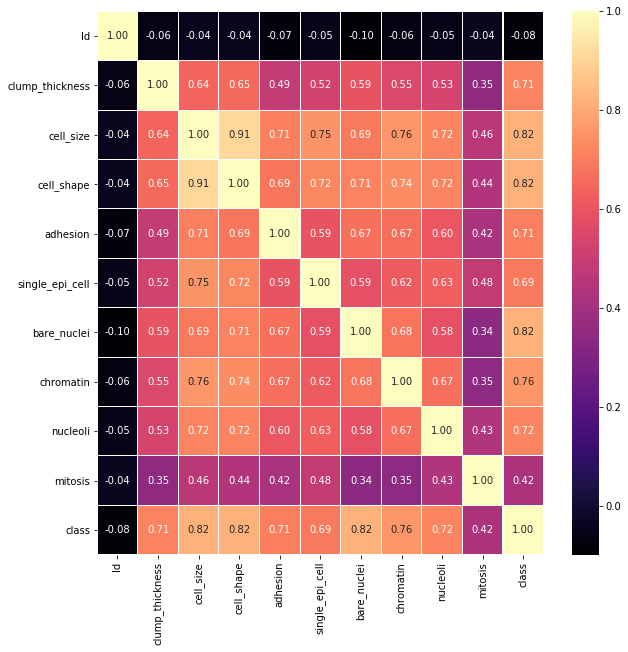

In [11]:
fig, axs = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr() , annot=True,linewidth = 0.05, fmt= '.2f',cmap="magma")
plt.show()

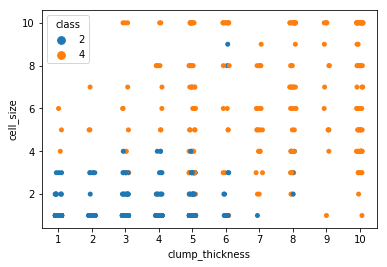

In [12]:
# creating a strip plot 
sns.stripplot(x="clump_thickness",y="cell_size",hue="class",data=df)

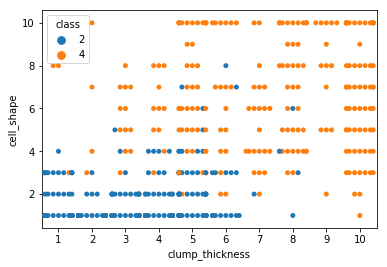

In [13]:
sns.swarmplot(x="clump_thickness",y="cell_shape",hue="class",data=df)

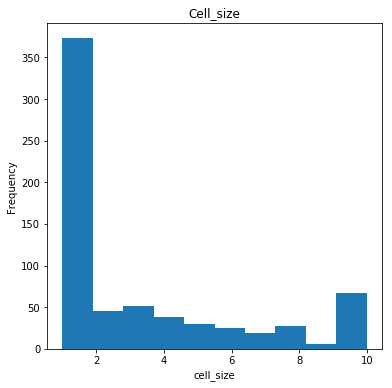

In [14]:
df['cell_size'].plot(kind = 'hist',bins=10, figsize=(6,6))
plt.title("Cell_size")
plt.xlabel("cell_size")
plt.ylabel("Frequency")
plt.show()

cancer is benign:  444
cancer is malignant:  239


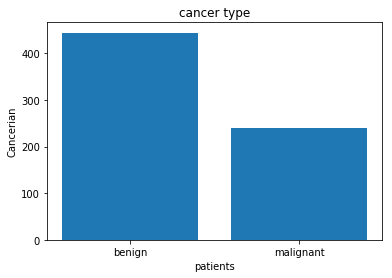

In [15]:
df1 =  len(df.loc[df["class"]== 2])
df2 =  len(df.loc[df["class"] == 4])

print("cancer is benign: " , df1)
print("cancer is malignant: " , df2)
y = np.array([df1,df2])
x = ["benign", "malignant"]
plt.bar(x,y)
plt.title("cancer type")
plt.xlabel("patients")
plt.ylabel("Cancerian")
plt.show()

# 3.Model Selection

In [16]:
df.shape

(683, 11)

In [17]:
X=df.drop(["class","Id"],axis=1)
Y=df["class"]

In [18]:
print("X_shape:", X.shape)
print("Y_shape:",Y.shape)

X_shape: (683, 9)
Y_shape: (683,)


In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 30)

In [20]:
print("X_train,Y_train:", X_train.shape,Y_train.shape)
print("X_test,Y_test:",X_test.shape,Y_test.shape)

X_train,Y_train: (546, 9) (546,)
X_test,Y_test: (137, 9) (137,)


## Logistic Regression Classifier

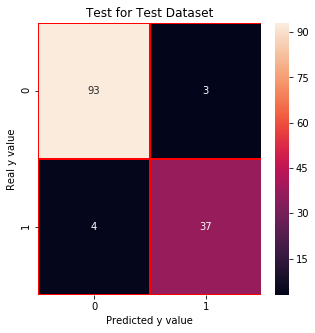

The accuracy_score is :  94.8905109489051


In [21]:
# building a model and prediction
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver = "lbfgs")
logmodel.fit(X_train,Y_train)
prediction = logmodel.predict(X_test)

# heatmap 
from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(Y_test,prediction)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()


from sklearn.metrics import accuracy_score
print("The accuracy_score is : " ,accuracy_score(Y_test,prediction)*100)

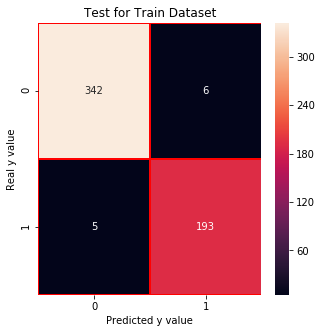

In [22]:
cm_lrc_train = confusion_matrix(Y_train, logmodel.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Train Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

## Support vector machine (SVM) classifier

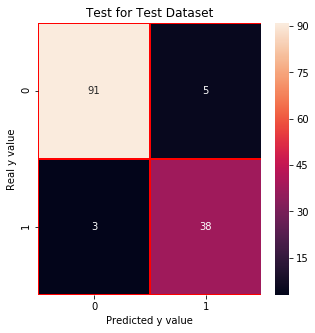

The F1 score is: 0.9419936703071548
The jacckard index: 0.9416058394160584


In [23]:
from sklearn import svm
clf=svm.SVC(kernel = "rbf", gamma = "scale")
clf.fit(X_train,Y_train)
y_hat = clf.predict(X_test)

# heatmap
cm_svm = confusion_matrix(Y_test,y_hat)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

from sklearn.metrics import f1_score
print("The F1 score is:" ,f1_score(Y_test, y_hat, average='weighted')) 
from sklearn.metrics import jaccard_similarity_score
print("The jacckard index:" ,jaccard_similarity_score(Y_test, y_hat))

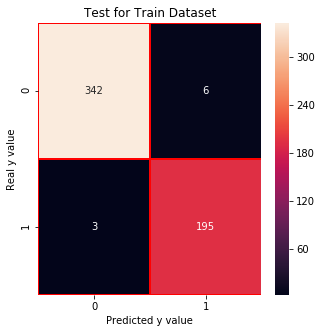

In [24]:
cm_svc_train = confusion_matrix(Y_train, clf.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Train Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

## Naive Bayes Classifier

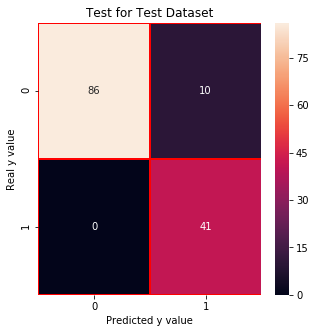

accuracy_score:  0.927007299270073


In [25]:
from sklearn.naive_bayes import BernoulliNB
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train,Y_train)
Y_pred=BernNB.predict(X_test)

#heatmap
cm_nev = confusion_matrix(Y_test,Y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nev,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

print("accuracy_score: ",accuracy_score(Y_test,Y_pred))

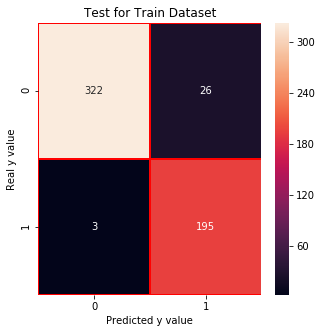

In [26]:
cm_nev_train = confusion_matrix(Y_train, BernNB.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nev_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Train Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

## Decision Tree Classifier

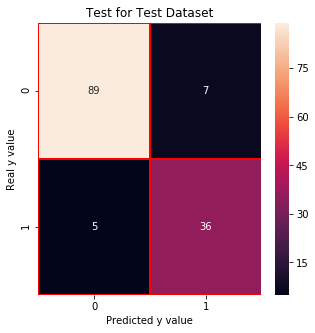

Accuracy score  using gini criterion is: 91.24087591240875


In [27]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini" , random_state = 100, max_depth = 3, min_samples_leaf = 4)
clf_gini.fit(X_train,Y_train)
y_pred = clf_gini.predict(X_test)

#heatmap
cm_dec = confusion_matrix(Y_test,y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dec,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

print("Accuracy score  using gini criterion is:" , accuracy_score(Y_test,y_pred)*100)

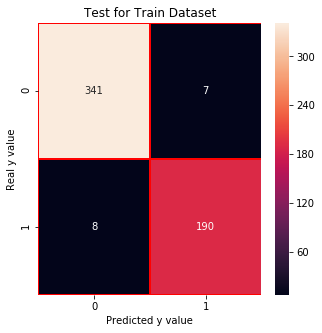

In [28]:
cm_dec_train = confusion_matrix(Y_train,clf_gini.predict(X_train)) 
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dec_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Train Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

## Random Forest Classifier

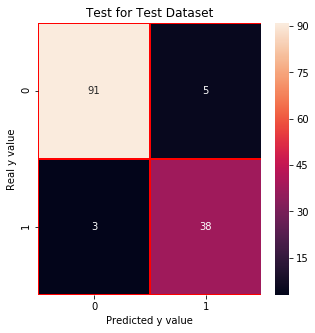

accuracy : 94.16058394160584


In [29]:
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier(n_jobs=2,random_state=0,n_estimators = 100)
clf2.fit(X_train,Y_train)
y_pred2 = clf2.predict(X_test)

#heatmap
cm_frst = confusion_matrix(Y_test,y_pred2)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_frst,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

print("accuracy :" ,accuracy_score(Y_test,y_pred2)*100)

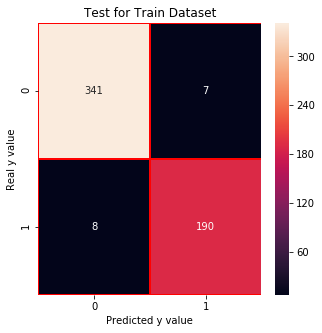

In [30]:
cm_frst_train = confusion_matrix(Y_train,clf2.predict(X_train)) 
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dec_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Train Dataset")
plt.xlabel("Predicted y value")
plt.ylabel("Real y value")
plt.show()

# 4. Comparing Accuracies of different model

In [31]:
print("The Accuracy of Logistic Regression is:" , accuracy_score(Y_test, prediction)*100)
print("The Accuracy of SVM is:" , accuracy_score(Y_test,y_hat)*100)
print("The Accuracy of Naive Bayes is:" , accuracy_score(Y_test,Y_pred)*100)
print("The Accuracy of Decision Trees is:" , accuracy_score(Y_test,y_pred)*100)
print("The Accuracy of Random Forest is:" , accuracy_score(Y_test,y_pred2)*100)

The Accuracy of Logistic Regression is: 94.8905109489051
The Accuracy of SVM is: 94.16058394160584
The Accuracy of Naive Bayes is: 92.7007299270073
The Accuracy of Decision Trees is: 91.24087591240875
The Accuracy of Random Forest is: 94.16058394160584
